<a href="https://colab.research.google.com/github/alimoradi296/DeepLearning/blob/main/cnnforCifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Problem Statemement

#Problem Statemement

*   CIFAR-10

> The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. its classes:

    Airplanes
    Cars
    Birds
    Cats
    Deer
    Dogs
    Frogs
    Horses
    Ships
    Trucks






#IMPORT LIBRARIES


In [ ]:
from google.colab import  drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 78.7 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorboard
    Found existing i

In [ ]:
import numpy as np
import datetime
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [ ]:
tf.__version__

'2.9.2'

#LOAD DATASET

In [ ]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_test.shape

(10000, 1)

#DATA VISUALIZATION

[2]


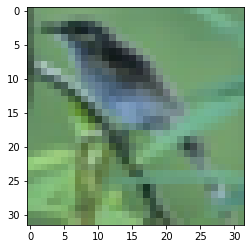

In [ ]:
image=800
plt.imshow(X_train[image])
print(y_train[image])

In [ ]:

def show_random_images(L_grid,W_grid,X_train,y_train,y_pred):
  fig,axes=plt.subplots(L_grid,W_grid,figsize=(15,15))
  axes=axes.ravel()

  n_training=len(X_train)

  for i in np.arange(0,L_grid*W_grid):
    index=np.random.randint(0,n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(f'real class:{y_train[index]}/n Predcited Class:{y_pred[index]}')
    axes[i].axis('off')
  plt.subplots_adjust(hspace=0.5)

/usr/local/lib/python3.8/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


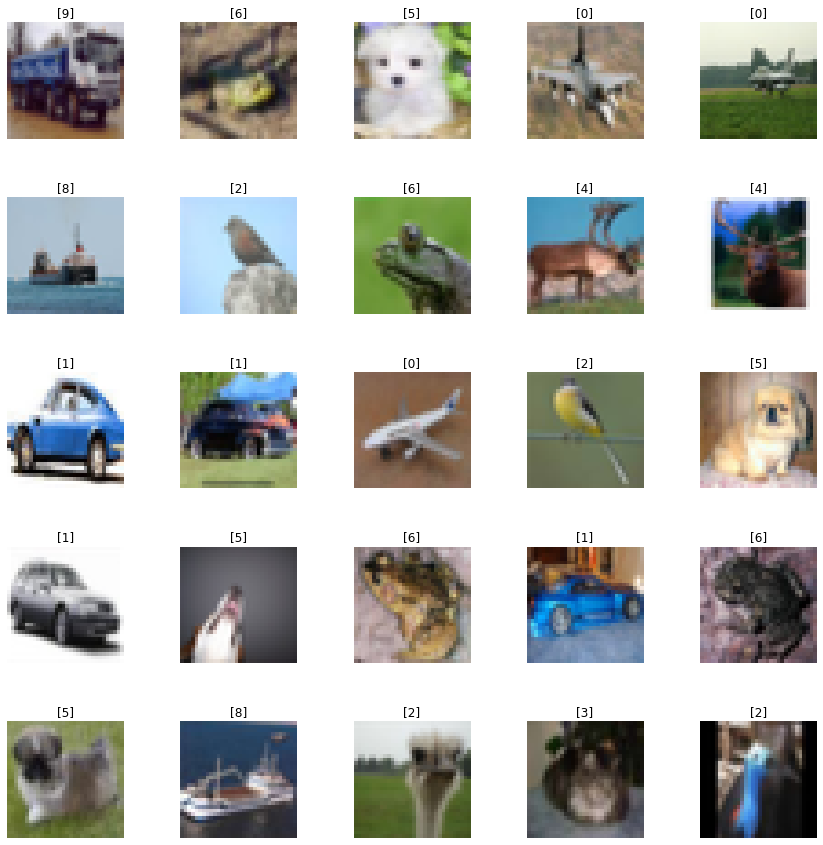

In [ ]:
W_grid=5
L_grid=5
show_random_images(L_grid,W_grid,X_train,y_train)

#DATA PREPARATION

In [ ]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [ ]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [ ]:
number_categ=10

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
import keras
y_train=keras.utils.to_categorical(y_train,number_categ)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_train=keras.utils.to_categorical(y_train,number_categ)

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
input_shape=X_train.shape[1:]

In [ ]:
input_shape

(32, 32, 3)

In [ ]:
y_train.shape

(50000, 10)

In [ ]:
y_test=keras.utils.to_categorical(y_test,number_categ)


#TRAIN THE MODEL

In [ ]:
cnn=tf.keras.Sequential()

cnn.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape))
cnn.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.3))


cnn.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
cnn.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(1024,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Dense(1024,activation='relu'))

cnn.add(tf.keras.layers.Dense(10,activation='softmax'))
cnn.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 64)        36928     
                                                      

In [ ]:
cnn.compile(optimizer=tf.keras.optimizers.RMSprop(),loss='categorical_crossentropy',metrics=['accuracy'])



In [ ]:
epochs=100
history=cnn.fit(X_train,y_train,batch_size=512,epochs=epochs)
 

Epoch 1/100
98/98 [==============================] - 4s 32ms/step - loss: 4.8070 - accuracy: 0.1699
Epoch 2/100
98/98 [==============================] - 3s 32ms/step - loss: 2.0447 - accuracy: 0.2760
Epoch 3/100
98/98 [==============================] - 3s 32ms/step - loss: 1.8152 - accuracy: 0.3614
Epoch 4/100
98/98 [==============================] - 3s 32ms/step - loss: 1.5898 - accuracy: 0.4380
Epoch 5/100
98/98 [==============================] - 3s 32ms/step - loss: 1.4379 - accuracy: 0.4973
Epoch 6/100
98/98 [==============================] - 3s 32ms/step - loss: 1.3167 - accuracy: 0.5436
Epoch 7/100
98/98 [==============================] - 3s 32ms/step - loss: 1.2080 - accuracy: 0.5811
Epoch 8/100
98/98 [==============================] - 3s 32ms/step - loss: 1.1208 - accuracy: 0.6134
Epoch 9/100
98/98 [==============================] - 3s 32ms/step - loss: 1.0390 - accuracy: 0.6407
Epoch 10/100
98/98 [==============================] - 3s 32ms/step - loss: 0.9760 - accuracy: 0.6637

#EVALUATE THE MODEL

In [ ]:
cnn.save('cnnmodel.h5')  # creates a HDF5 file 'my_model.h5'

In [ ]:
evaluation=cnn.evaluate(X_test,y_test)
#print(f'Test_accuratcy{evaluation[1]}')

313/313 [==============================] - 1s 4ms/step - loss: 0.7827 - accuracy: 0.7687


In [ ]:
y_test.shape

(50000, 10, 10)

In [ ]:
predicted_class=cnn.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
y_test=y_test.argmax(1)

In [ ]:
predicted_class=predicted_class.argmax(1)

In [ ]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

In [ ]:
X_test

array([[[[158., 112.,  49.],
         [159., 111.,  47.],
         [165., 116.,  51.],
         ...,
         [137.,  95.,  36.],
         [126.,  91.,  36.],
         [116.,  85.,  33.]],

        [[152., 112.,  51.],
         [151., 110.,  40.],
         [159., 114.,  45.],
         ...,
         [136.,  95.,  31.],
         [125.,  91.,  32.],
         [119.,  88.,  34.]],

        [[151., 110.,  47.],
         [151., 109.,  33.],
         [158., 111.,  36.],
         ...,
         [139.,  98.,  34.],
         [130.,  95.,  34.],
         [120.,  89.,  33.]],

        ...,

        [[ 68., 124., 177.],
         [ 42., 100., 148.],
         [ 31.,  88., 137.],
         ...,
         [ 38.,  97., 146.],
         [ 13.,  64., 108.],
         [ 40.,  85., 127.]],

        [[ 61., 116., 168.],
         [ 49., 102., 148.],
         [ 35.,  85., 132.],
         ...,
         [ 26.,  82., 130.],
         [ 29.,  82., 126.],
         [ 20.,  64., 107.]],

        [[ 54., 107., 160.],
       

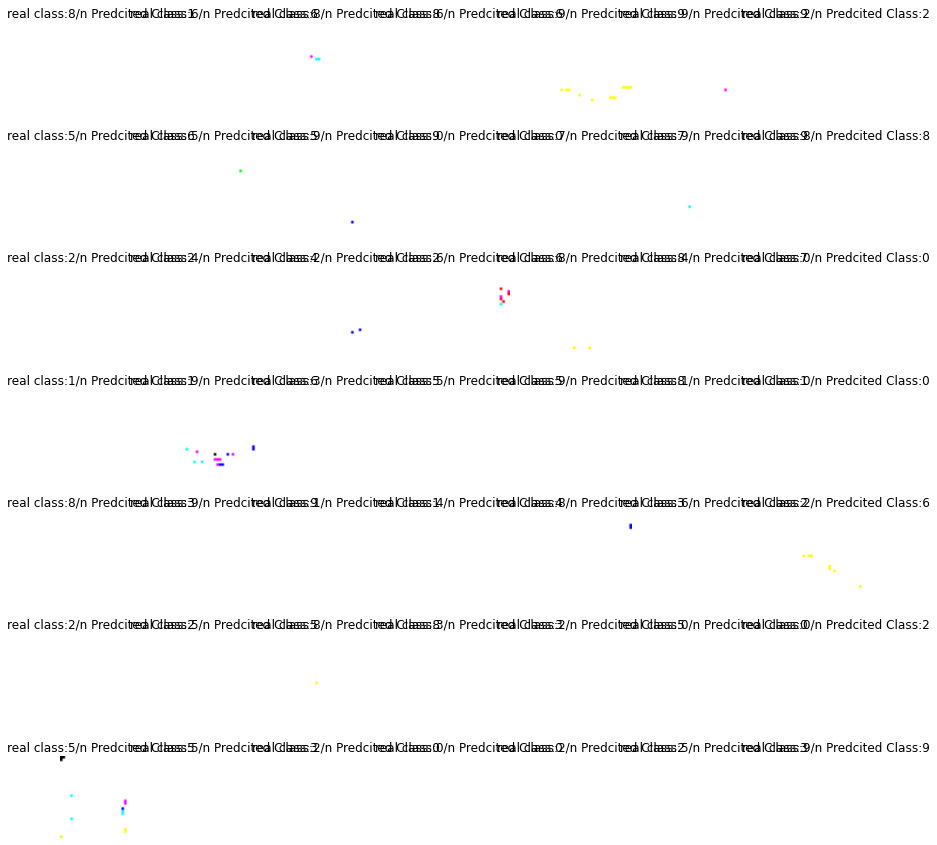

In [ ]:
show_random_images(7,7,X_test,y_test,predicted_class)

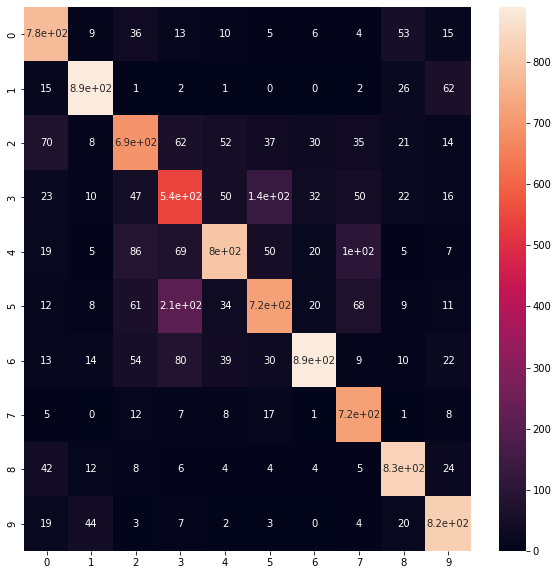

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(predicted_class, y_test)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)